In [1]:
from datetime import datetime
import numpy as np            
import pandas as pd            
import matplotlib.pylab as plt 
import seaborn as sns
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4

In [2]:
!pip install pmdarima

In [3]:
data = pd.read_csv(r"C:\Users\SOHINI\Desktop\Trim 4\AirPassengers.csv",parse_dates=True)
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


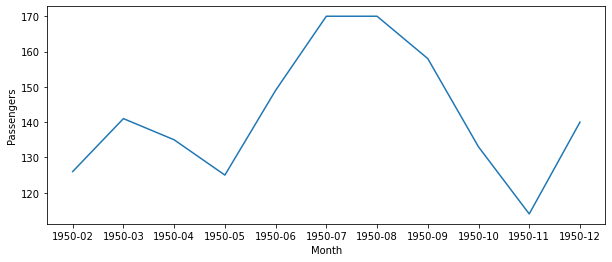

In [5]:
sns.lineplot( x="Month" , y="Passengers"  , data=data[13:24])

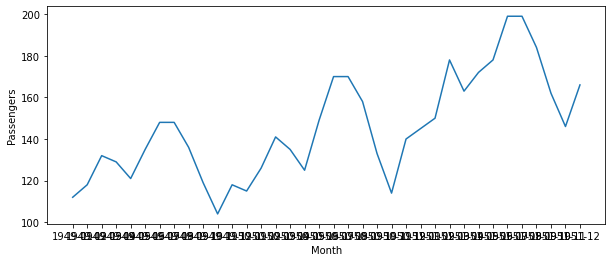

In [6]:
sns.lineplot( x="Month" , y="Passengers"  , data=data[:36])

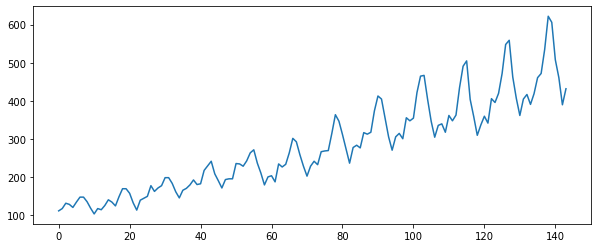

In [7]:
data1=data['Passengers']
data1.plot()

In [8]:
rolmean = data1.rolling(window=6).mean() 
rolstd = data1.rolling(window=6).std()
print(rolmean,rolstd)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
139    519.166667
140    534.000000
141    534.000000
142    520.333333
143    503.166667
Name: Passengers, Length: 144, dtype: float64 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
139    82.470399
140    67.495185
141    67.495185
142    87.805846
143    94.200672
Name: Passengers, Length: 144, dtype: float64


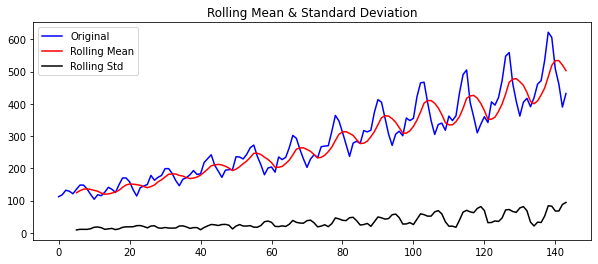

In [9]:
orig = plt.plot(data1, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
dftest = adfuller(data['Passengers'], autolag='AIC')
dfoutput = pd.DataFrame(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

                                 0  Critical Value (1%)  Critical Value (5%)  \
Test Statistic            0.815369            -3.481682            -2.884042   
p-value                   0.991880            -3.481682            -2.884042   
Lags Used                13.000000            -3.481682            -2.884042   
Number of Observations  130.000000            -3.481682            -2.884042   

                        Critical Value (10%)  
Test Statistic                      -2.57877  
p-value                             -2.57877  
Lags Used                           -2.57877  
Number of Observations              -2.57877  


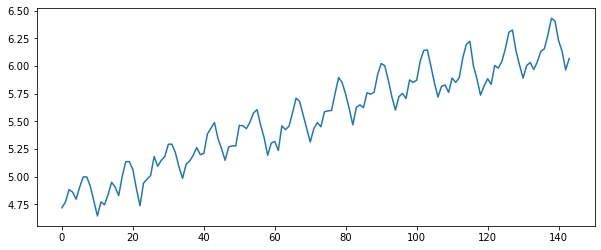

In [11]:
logarithm = np.log(data1)
plt.plot(logarithm)

In [12]:
dftest = adfuller(logarithm, autolag='AIC')
dfoutput = pd.DataFrame(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

                                 0  Critical Value (1%)  Critical Value (5%)  \
Test Statistic           -1.717017            -3.481682            -2.884042   
p-value                   0.422367            -3.481682            -2.884042   
Lags Used                13.000000            -3.481682            -2.884042   
Number of Observations  130.000000            -3.481682            -2.884042   

                        Critical Value (10%)  
Test Statistic                      -2.57877  
p-value                             -2.57877  
Lags Used                           -2.57877  
Number of Observations              -2.57877  


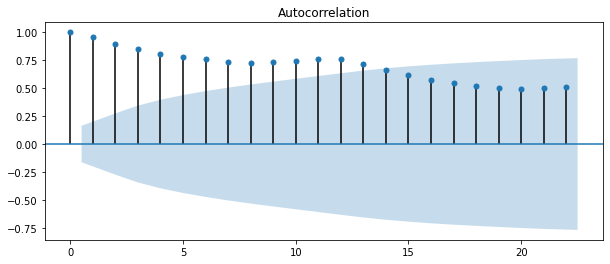

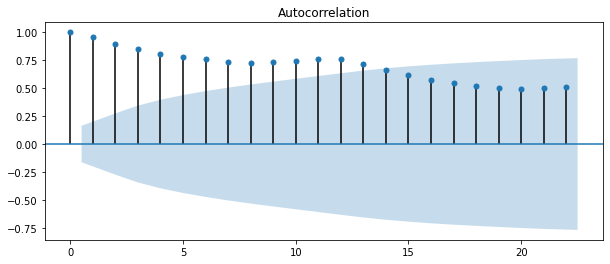

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(logarithm)

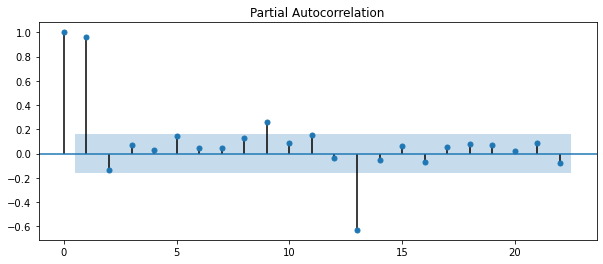

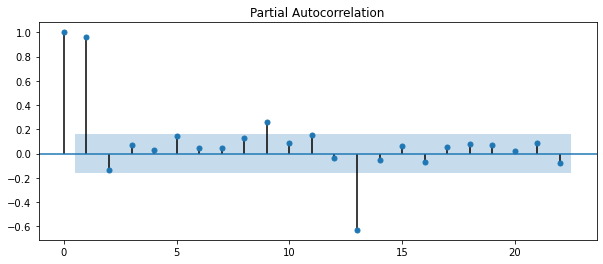

In [14]:
plot_pacf(logarithm)

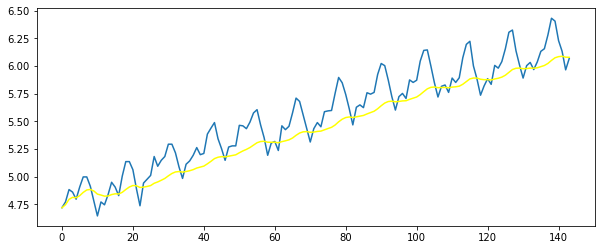

In [18]:
expdecay = logarithm.ewm(halflife=10, min_periods=0, adjust=True).mean()
plt.plot(logarithm)
plt.plot(expdecay, color='yellow')

In [59]:
detrend1= logarithm-expdecay

In [60]:
detrend1.dropna(inplace=True)
detrend1.head(10)

0    0.000000
1    0.025189
2    0.088331
3    0.047271
4   -0.012921
5    0.077557
6    0.139969
7    0.117948
8    0.028573
9   -0.090901
Name: Passengers, dtype: float64

In [61]:
dftest = adfuller(detrend1, autolag='AIC')
dfoutput = pd.DataFrame(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

                                 0  Critical Value (1%)  Critical Value (5%)  \
Test Statistic           -3.593215            -3.481682            -2.884042   
p-value                   0.005892            -3.481682            -2.884042   
Lags Used                13.000000            -3.481682            -2.884042   
Number of Observations  130.000000            -3.481682            -2.884042   

                        Critical Value (10%)  
Test Statistic                      -2.57877  
p-value                             -2.57877  
Lags Used                           -2.57877  
Number of Observations              -2.57877  


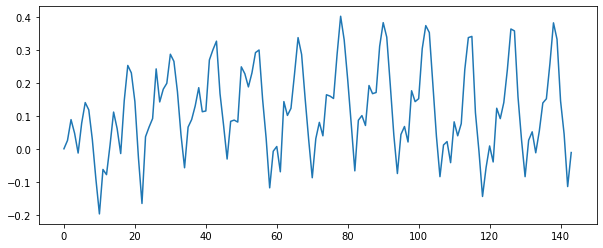

In [62]:
detrend1.plot()

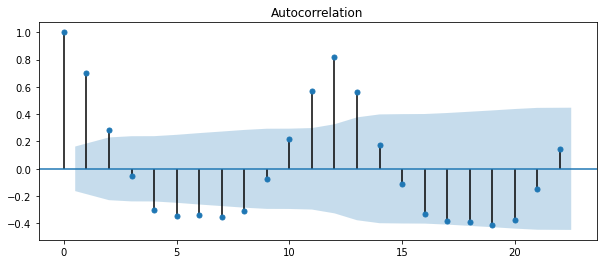

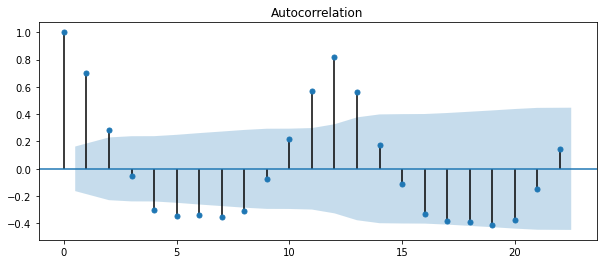

In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(detrend1)

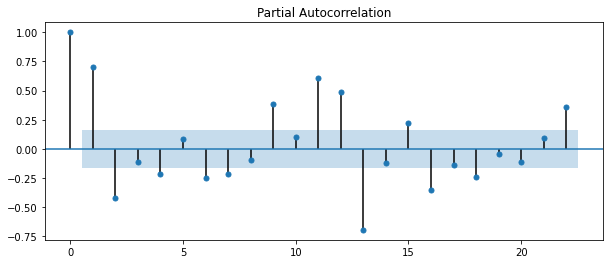

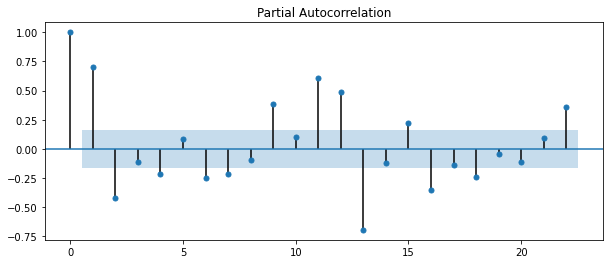

In [64]:
plot_pacf(detrend1)

In [65]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(detrend1, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-244.902, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-248.392, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-250.387, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-246.902, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-254.645, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-253.443, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-250.520, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-276.008, Time=1.19 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=1.11 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 6.201 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:     

In [66]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(detrend1, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-175.040, Time=0.21 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-186.294, Time=0.24 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-177.037, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-197.265, Time=0.21 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-199.264, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-188.294, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.45 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 3.598 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               

Text(0.5, 1.0, 'RSS: nan')

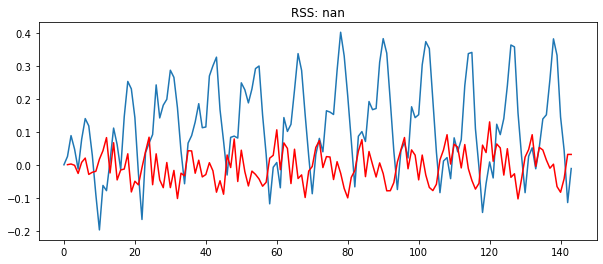

In [67]:
model = ARIMA(detrend1, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(detrend1)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - detrend1)**2))

In [68]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 144.383
Method:                       css-mle   S.D. of innovations              0.087
Date:                Wed, 23 Sep 2020   AIC                           -276.765
Time:                        09:57:53   BIC                           -258.988
Sample:                             1   HQIC                          -269.542
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0004      0.001      0.695      0.487      -0.001       0.001
ar.L1.D.Passengers     0.2453      0.196      1.250      0.211      -0.139       0.630
ar.L2.D.Passengers  

Text(0.5, 1.0, 'RSS: nan')

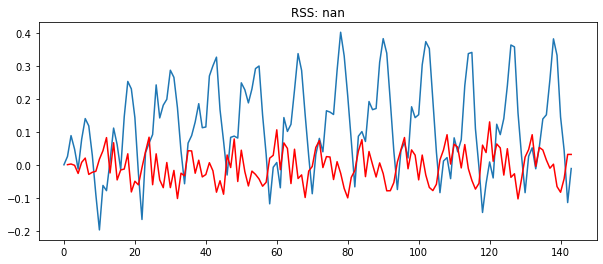

In [58]:
model = ARIMA(detrend1, order=(2,1,2))
results_ARIMA1 = model.fit(disp=-1)
plt.plot(detrend1)
plt.plot(results_ARIMA1.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA1.fittedvalues - detrend1)**2))

In [32]:
print(results_ARIMA1.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 144.383
Method:                       css-mle   S.D. of innovations              0.087
Date:                Wed, 23 Sep 2020   AIC                           -276.765
Time:                        09:25:54   BIC                           -258.988
Sample:                             1   HQIC                          -269.542
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0004      0.001      0.695      0.487      -0.001       0.001
ar.L1.D.Passengers     0.2453      0.196      1.250      0.211      -0.139       0.630
ar.L2.D.Passengers  

In [33]:
pred = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(pred.head())

2   -0.000112
3   -0.011570
4    0.029214
5    0.038377
6   -0.053369
dtype: float64


In [34]:
pred_cum = pred.cumsum()
print(pred_cum)

2     -0.000112
3     -0.011682
4      0.017532
5      0.055909
6      0.002540
         ...   
139   -0.085210
140   -0.022657
141    0.082333
142    0.089184
143    0.086147
Length: 142, dtype: float64


In [35]:
pred_log = pd.Series(detrend1.iloc[0], index=data1.index)
pred_log = pred_log.add(pred_cum, fill_value=0)
pred_log.head()

0    0.000000
1    0.000000
2   -0.000112
3   -0.011682
4    0.017532
dtype: float64

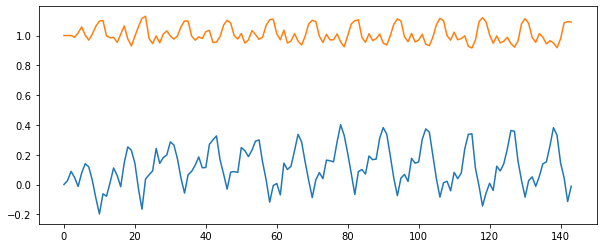

In [36]:
predictions = np.exp(pred_log)
plt.plot(detrend1)
plt.plot(predictions)

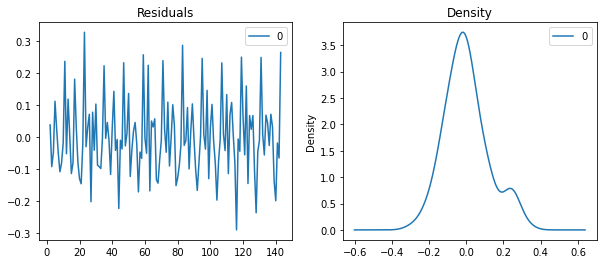

In [38]:
residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

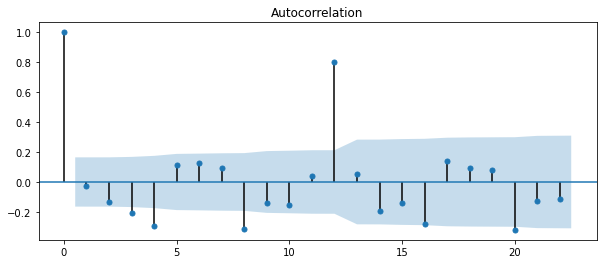

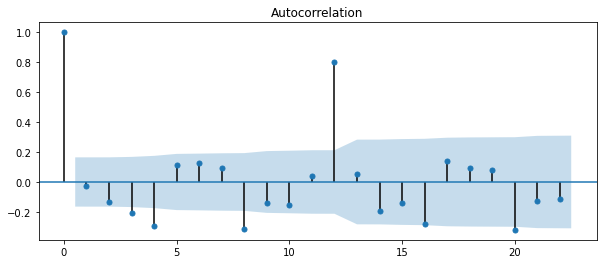

In [39]:
plot_acf(residuals)

C:\Users\SOHINI\Anaconda3\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


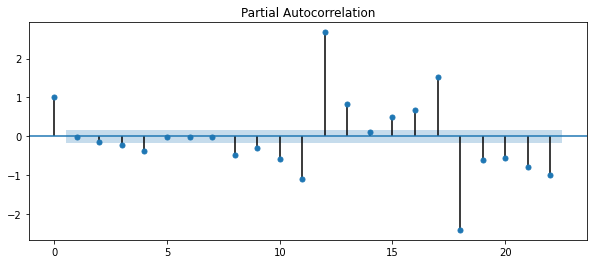

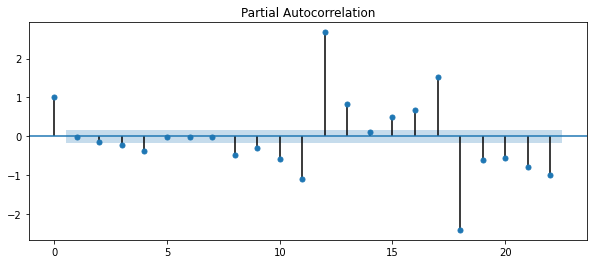

In [40]:
plot_pacf(residuals)

In [41]:
import statsmodels.api as sm

In [42]:
sm.stats.durbin_watson(results_ARIMA.resid.values)

2.0170133353410913

In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags = 12)

C:\Users\SOHINI\Anaconda3\New folder\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([1.04619829e-01, 2.78749216e+00, 9.20534894e+00, 2.22358510e+01,
        2.41780959e+01, 2.64789163e+01, 2.77338758e+01, 4.29510174e+01,
        4.59504296e+01, 4.96364989e+01, 4.99284921e+01, 1.51554272e+02]),
 array([7.46354554e-01, 2.48143994e-01, 2.66816532e-02, 1.79876562e-04,
        2.00653677e-04, 1.81246630e-04, 2.45691838e-04, 8.97284252e-07,
        6.15103860e-07, 3.11291703e-07, 6.44742835e-07, 2.74247136e-26]))

In [44]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags = 6)

(array([ 0.10461983,  2.78749216,  9.20534894, 22.23585102, 24.17809595,
        26.4789163 ]),
 array([7.46354554e-01, 2.48143994e-01, 2.66816532e-02, 1.79876562e-04,
        2.00653677e-04, 1.81246630e-04]))

In [45]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags = 4)

(array([ 0.10461983,  2.78749216,  9.20534894, 22.23585102]),
 array([7.46354554e-01, 2.48143994e-01, 2.66816532e-02, 1.79876562e-04]))

In [46]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags = 2)

(array([0.10461983, 2.78749216]), array([0.74635455, 0.24814399]))

In [18]:
#ARMA MODEL - OMLETTE DATASET 

In [19]:
df= pd.read_excel(r"C:\Users\SOHINI\Desktop\Trim 4\Triple Exponential Smoothing .xls")
df.head(2)

,Date,Omellette
0,2014-10-01,15
1,2014-10-02,7


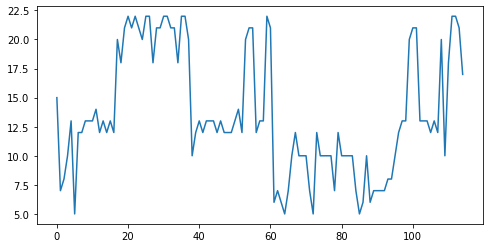

In [20]:
df1 = df['Omellette']
df1.plot()

In [21]:
import statsmodels.api as sm

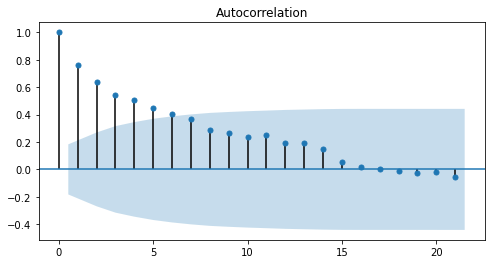

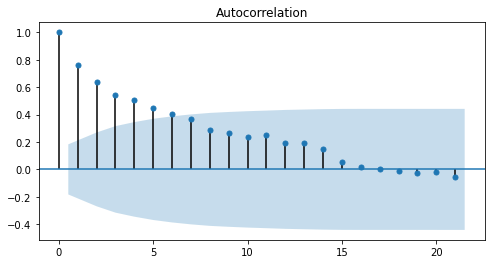

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1)

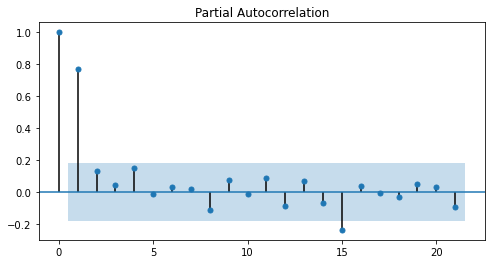

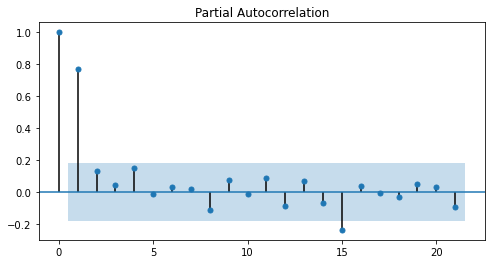

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df1)

In [24]:
df2 = np.sqrt(df1)

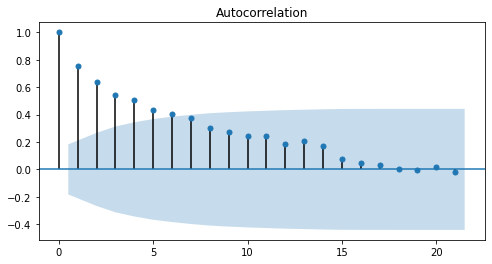

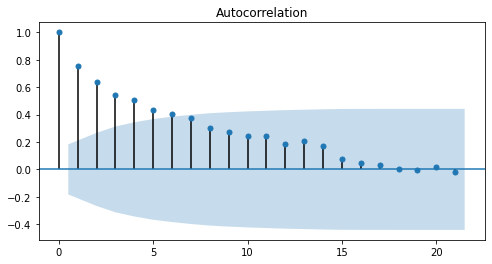

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2)

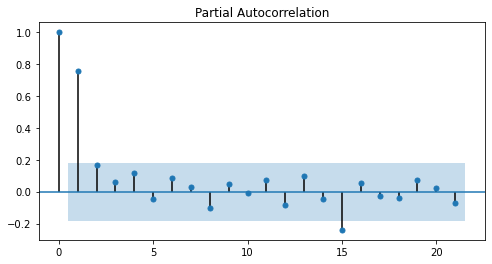

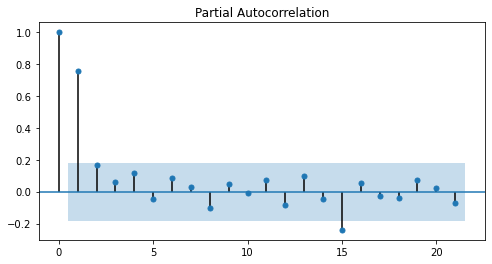

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df2)

In [27]:
from statsmodels.tsa.holtwinters import Holt
span = 4
alpha = 5/(span+1)
beta = 0.05
model =Holt(df2).fit(smoothing_level=alpha,smoothing_slope=beta)
data4 = model.forecast(15).rename('DES Forecast')

C:\Users\SOHINI\Anaconda3\New folder\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


C:\Users\SOHINI\Anaconda3\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


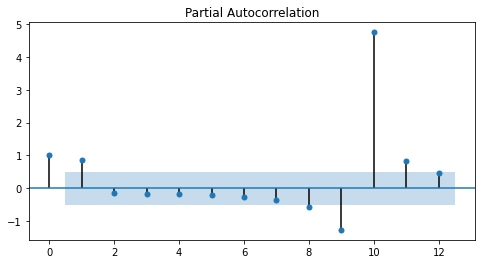

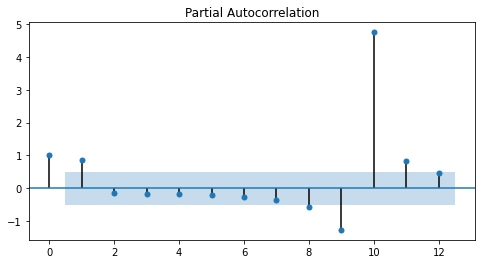

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data4)

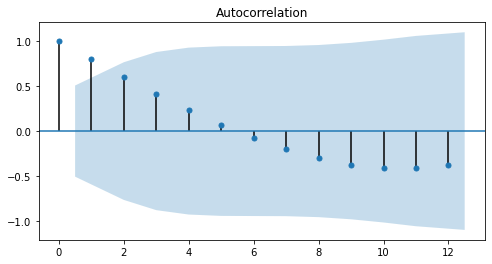

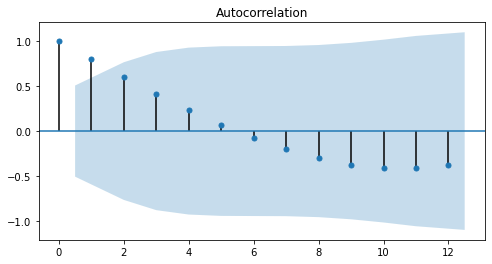

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data4)

In [30]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

In [31]:
model = ARIMA(df2, order = (1,0,1))
ARMA = model.fit(disp = 0)

In [32]:
ARMA

In [33]:
print(ARMA.summary())

                              ARMA Model Results                              
Dep. Variable:              Omellette   No. Observations:                  115
Model:                     ARMA(1, 1)   Log Likelihood                 -75.405
Method:                       css-mle   S.D. of innovations              0.464
Date:                Wed, 16 Sep 2020   AIC                            158.810
Time:                        09:50:01   BIC                            169.789
Sample:                             0   HQIC                           163.266
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.6430      0.219     16.645      0.000       3.214       4.072
ar.L1.Omellette     0.8643      0.064     13.517      0.000       0.739       0.990
ma.L1.Omellette    -0.2802      

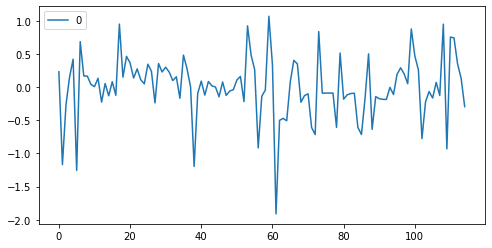

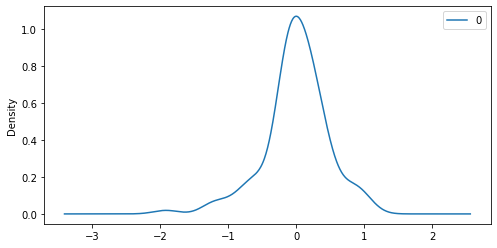

                0
count  115.000000
mean     0.000621
std      0.467201
min     -1.912167
25%     -0.167239
50%      0.018213
75%      0.248672
max      1.067378


In [34]:
from pandas import DataFrame
residuals = DataFrame(ARMA.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

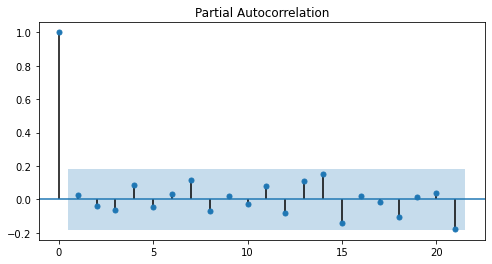

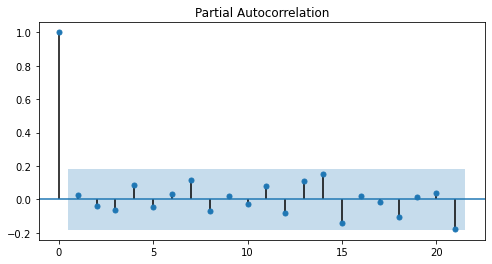

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(residuals)

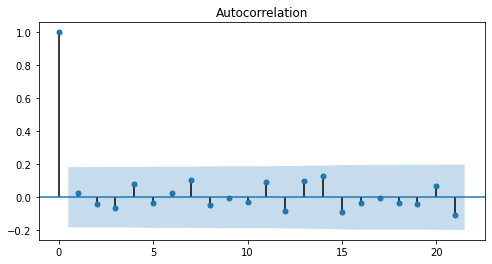

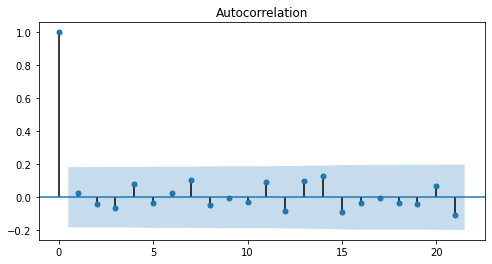

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)

In [37]:
sm.stats.durbin_watson(ARMA.resid.values)

1.9457545895187593

In [38]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(residuals, lags = 12)

C:\Users\SOHINI\Anaconda3\New folder\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([0.06974532, 0.26099564, 0.75382855, 1.58815943, 1.7326825 ,
        1.81455514, 3.13160157, 3.38391557, 3.3860102 , 3.50185409,
        4.54699039, 5.39162098]),
 array([0.79170795, 0.87765841, 0.86047569, 0.81091867, 0.88475687,
        0.93593942, 0.8725669 , 0.90800987, 0.9470088 , 0.96703539,
        0.95110973, 0.9436044 ]))